<a href="https://colab.research.google.com/github/Roberto-Ulises-Cruz-Olivares/EDPI/blob/main/Resolviendo_EDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La solución de la ecuación
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$u_x(0,t)=u(1,t)=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=x,\;\;\;0<x<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=\frac{1}{2}+\sum_{n=1}^{\infty} 2\frac{(-1)^{n}-1}{n^2 \pi^2}  \cos(n\pi x)e^{-(n\pi)^2 t}.$$

In [45]:
from pylab import *


Empezamos a graficar la Condicion inicial
$$u(x,0)=x$$

In [46]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = x[i]
    return y

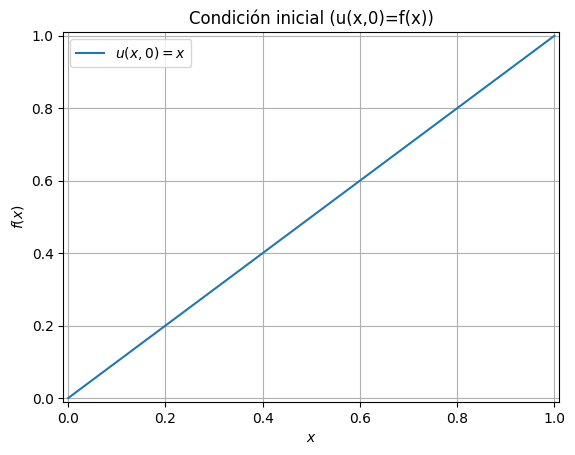

In [47]:
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-0.01,1.01]),grid(),legend()
show()

Usamos una serie de fourier para aproximar la condicion inicial $u(x,0)=x$
$$u(x,0)=\frac{1}{2}+ \sum_{n=1}^{\infty} 2\frac{(-1)^{n}-1}{n^2 \pi^2}  \cos(n\pi x).$$

In [48]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += 2*((((-1)**n - 1)/(n*pi)**2)*e**(-((n*pi)**2)*0 )*cos(n*pi*x))
    return (1/2)+f

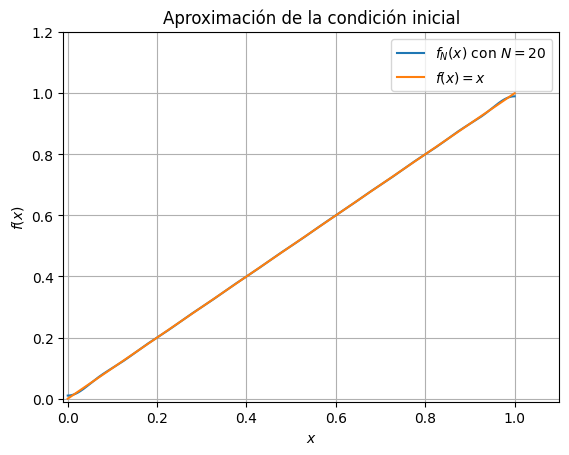

In [49]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,1.2]),grid(),legend()
show()

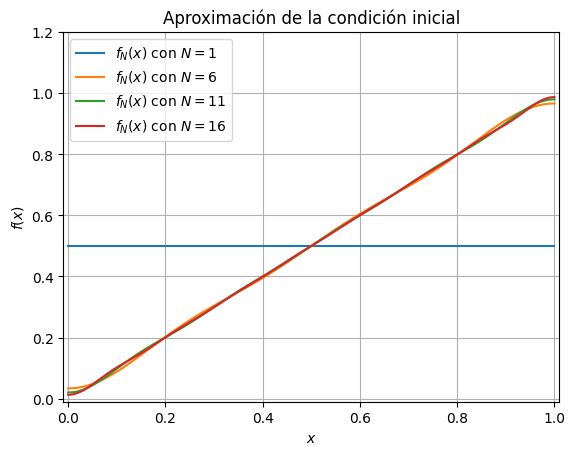

In [50]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Donde $u(x,t)=x$
$$u(x,t)=\frac{1}{2}+ \sum_{n=1}^{\infty} 2\frac{(-1)^{n}-1}{n^2 \pi^2}  \cos(n\pi x) e^{-n^2 \pi^2 t}.$$

In [56]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += 2*( (((-1)**n - 1)/(n*pi)**2)*e**(-((n*pi)**2)*t[i] )*cos(n*pi*x) )
    return (1/2)+f

In [57]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

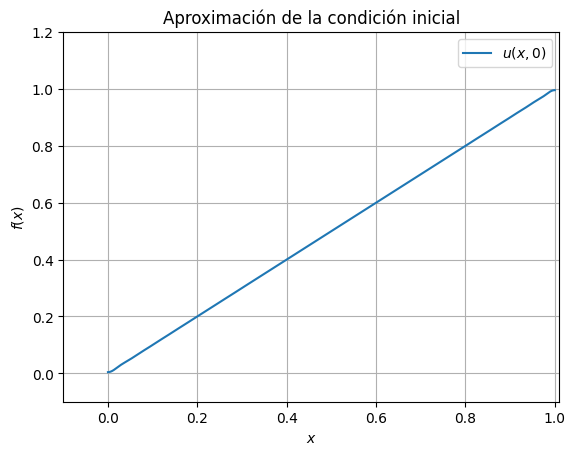

In [58]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.1,1.01]),ylim([-0.1,1.2]),grid(),legend()
show()

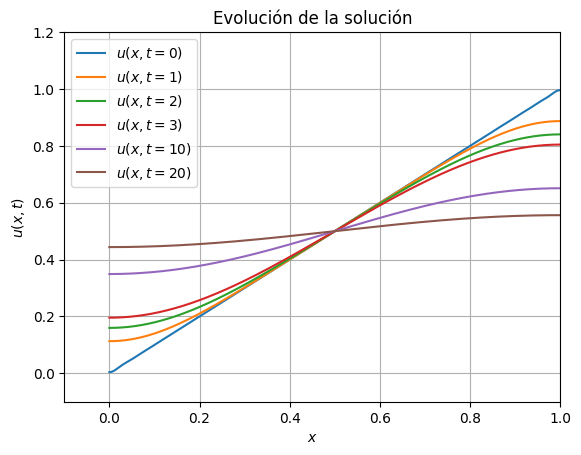

In [59]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$');
plt.title("Evolución de la solución")
xlim([-0.1,1]),ylim([-0.1,1.2]),grid(),legend()
show()

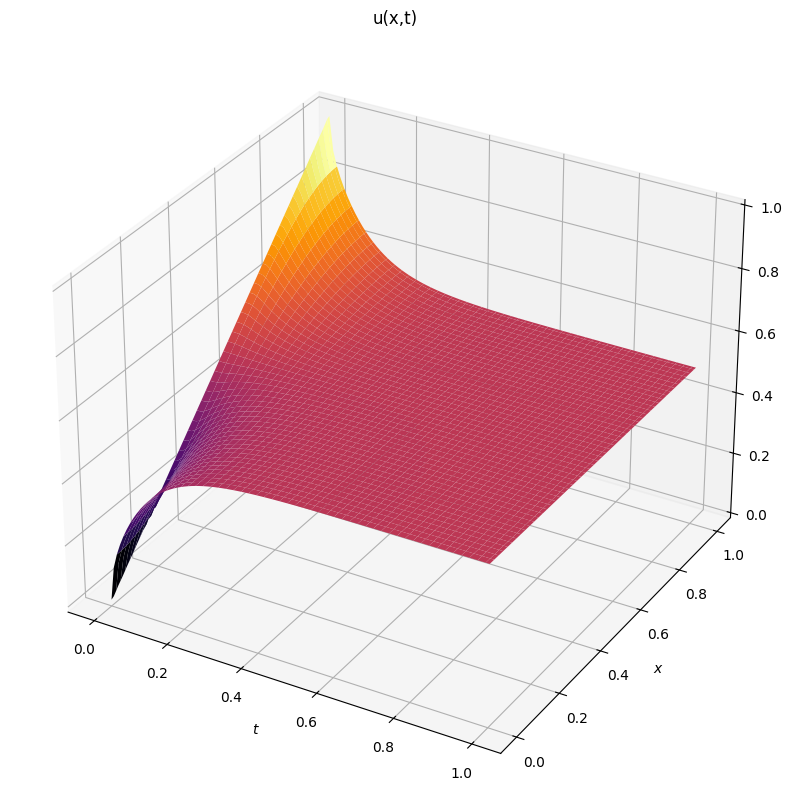

In [60]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$');
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"